Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.3  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić  

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **4. studenog 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
#seven_y = np.array([-1, -1, -1, -1, 1, 1, 1])

Predictions accuracy : 1.0
[[-0.5 -0.1]]
[2.1]


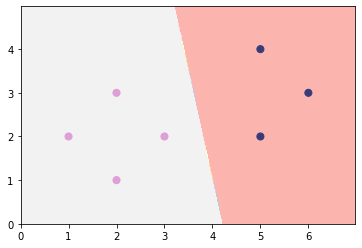

In [55]:
# Vaš kôd ovdje
clasifier = RidgeClassifier(alpha=0)
clasifier.fit(seven_X,seven_y)
predictions = clasifier.predict(seven_X)
print("Predictions accuracy :",accuracy_score(seven_y,predictions))
h = clasifier.predict
mlutils.plot_2d_clf_problem(seven_X,seven_y,h)

print(clasifier.coef_)
print(clasifier.intercept_)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

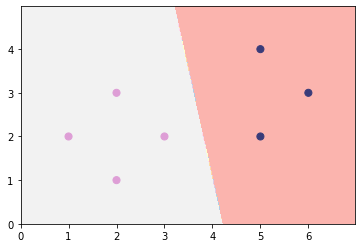

In [5]:
# Vaš kôd ovdje
linear_regresion_model = LinearRegression().fit(seven_X, seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x: linear_regresion_model.predict(x)>=0.5)

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

Predictions accuracy : 0.875


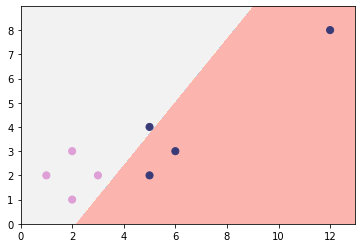

In [7]:
# Vaš kôd ovdje
clasifier = RidgeClassifier(alpha=0)
clasifier.fit(outlier_X,outlier_y)
predictions = clasifier.predict(outlier_X)
print("Predictions accuracy :",accuracy_score(outlier_y,predictions))
mlutils.plot_2d_clf_problem(outlier_X,outlier_y,clasifier.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

Predictions accuracy : 0.875


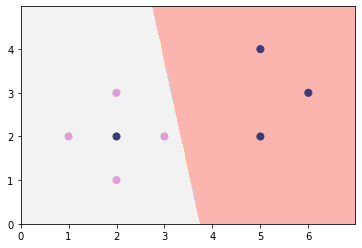

In [9]:
# Vaš kôd ovdje
clasifier = RidgeClassifier(alpha=0)
clasifier.fit(unsep_X,unsep_y)
predictions = clasifier.predict(unsep_X)
print("Predictions accuracy :",accuracy_score(unsep_y,predictions))
mlutils.plot_2d_clf_problem(unsep_X,unsep_y,clasifier.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

In [10]:
from sklearn.datasets import make_classification

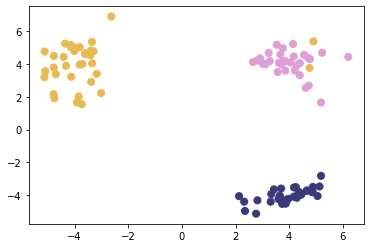

In [11]:
# Vaš kôd ovdje
multi_class_X, multi_class_y = make_classification(n_features=2,n_redundant=0,n_clusters_per_class=1, n_classes=3,class_sep=4)
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

h1(x)


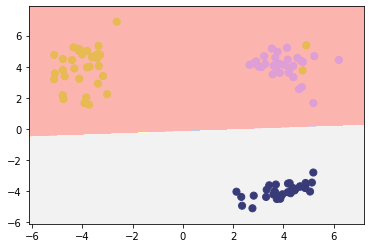

h2(x)


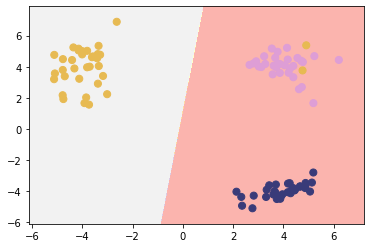

h3(x)


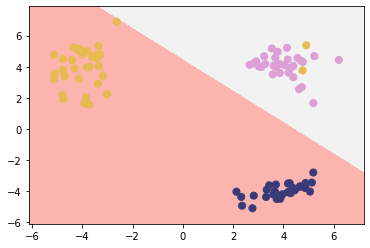

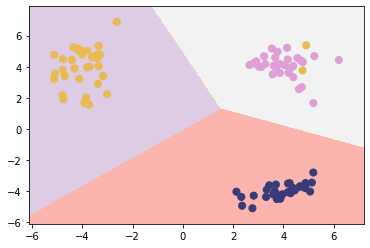

In [12]:
# Vaš kôd ovdje

# making one class '1' and other two '0'
multi_class_y_first_group = np.where(multi_class_y==0, 4, multi_class_y)
multi_class_y_first_group = np.where(multi_class_y_first_group!=4, 0, multi_class_y_first_group)
multi_class_y_first_group = np.where(multi_class_y_first_group==4, 1, multi_class_y_first_group)


multi_class_y_second_group = np.where(multi_class_y==1, 4, multi_class_y)
multi_class_y_second_group = np.where(multi_class_y_second_group!=4, 0, multi_class_y_second_group)
multi_class_y_second_group = np.where(multi_class_y_second_group==4, 1, multi_class_y_second_group)


multi_class_y_third_group = np.where(multi_class_y==2, 4, multi_class_y)
multi_class_y_third_group = np.where(multi_class_y_third_group!=4, 0, multi_class_y_third_group)
multi_class_y_third_group = np.where(multi_class_y_third_group==4, 1, multi_class_y_third_group)



# training OVR
print("h1(x)")
linear_regresion_model_first = LinearRegression().fit(multi_class_X, multi_class_y_first_group)
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y,lambda x: linear_regresion_model_first.predict(x)>=0.5)
plt.show()
print("h2(x)")
linear_regresion_model_second = LinearRegression().fit(multi_class_X, multi_class_y_second_group)
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y,lambda x: linear_regresion_model_second.predict(x)>=0.5)
plt.show()
print("h3(x)")
linear_regresion_model_third = LinearRegression().fit(multi_class_X, multi_class_y_third_group)
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y,lambda x: linear_regresion_model_third.predict(x)>=0.5)
plt.show()


h = lambda x: np.argmax([linear_regresion_model_first.predict(x.reshape(1,-1)), linear_regresion_model_second.predict(x.reshape(1,-1)), linear_regresion_model_third.predict(x.reshape(1,-1))])
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y,h)

Predictions accuracy : 0.98


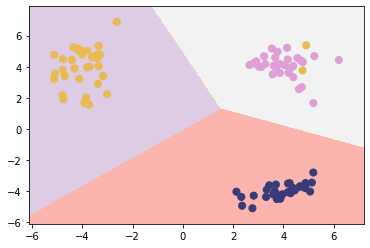

In [13]:
clasifier = RidgeClassifier(alpha=0)
clasifier.fit(multi_class_X,multi_class_y)
predictions = clasifier.predict(multi_class_X)
print("Predictions accuracy :",accuracy_score(multi_class_y,predictions))
mlutils.plot_2d_clf_problem(multi_class_X,multi_class_y,clasifier.predict)

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

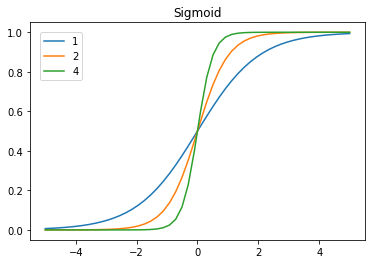

In [59]:
# Vaš kôd ovdje
import math
def sigm(x,alfa=1):
    return 1/(1+math.exp(-alfa*x))

alpha = [1,2,4]

X = np.linspace(-5,5)

plt.title("Sigmoid")

for a in alpha:
    sigma = [sigm(x,a) for x in X]
    plt.plot(X,sigma,label=str(a))
plt.legend(loc='upper left', borderaxespad=1.)
plt.show()
    

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [355]:
from numpy import linalg
from sklearn.preprocessing import PolynomialFeatures
import copy 

def lr_h(x, w):
    return sigm(np.dot(w,np.transpose(x)))

def cross_entropy_error(X, y, w, alpha): 
    sum_of_cross_entropy_loss = 0.0
    for x,y_i in zip(X,y):
        sum_of_cross_entropy_loss += (-y_i*np.log(lr_h(x,w))-(1-y_i)*np.log(1-lr_h(x,w)))
    return sum_of_cross_entropy_loss/len(y) + (alpha/2)*np.dot(np.transpose(w),w)

def lr_train(X, y, eta=0.01, max_iter=2000, trace=False, alpha=0, epsilon=0.000001):
    X = PolynomialFeatures(1).fit_transform(X)
    w = np.array([0.0 for i in range(X.shape[1])])
    all_w = []
    for k in range(max_iter):
        
        cross_entropy_error_before = cross_entropy_error(X,y,w,alpha)
        
        
        dw0 = np.array([0.0])
        dw = np.array([0.0 for i in range(X.shape[1]-1)])
        
        for x_i,y_i in zip(X,y):
            h = lr_h(x_i,w)
            dw0 += h - y_i 
            dw += (h-y_i)*x_i[1:]
            
            
        w[0] -= eta*dw0
        w[1:] = w[1:]*(1-eta*alpha)- eta*dw

        all_w.append(copy.deepcopy(w))
        cross_entropy_error_after = cross_entropy_error(X,y,w,alpha)
        
        if abs(cross_entropy_error_before - cross_entropy_error_after) < epsilon:
            break
    if trace:
        return w,all_w
    else:
        return w


#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

[ 4.90521002 -1.12506945 -0.24133993]
2.413731179946898


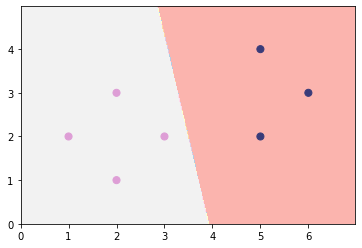

In [369]:
# Vaš kôd ovdje
# data
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])


seven_X_transformed = PolynomialFeatures(1).fit_transform(seven_X)
weights, all_w = lr_train(seven_X,seven_y,alpha=1.0,trace=True)
# koristiti sigmd
h = np.dot(w,np.transpose(seven_X_transformed))
print(weights)
print(np.dot(weights[1:],np.transpose(seven_X[0])) + weights[0])
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x: (np.dot(weights[1:],np.transpose(x)) + weights[0])>=0.5)



**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

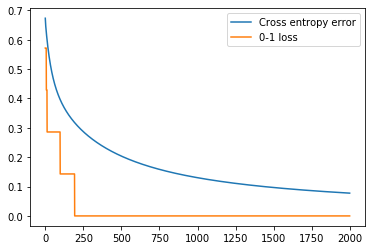

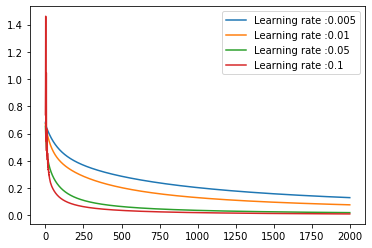

In [394]:
# Vaš kôd ovdje
from sklearn.metrics import zero_one_loss
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])
seven_X_transformed = PolynomialFeatures(1).fit_transform(seven_X)
final_weights, all_weights = lr_train(seven_X,seven_y,alpha=0,trace=True)


cross_entropy_errors = []
classification_errors = []
for wei in all_weights:
    cross_entropy_errors.append(cross_entropy_error(seven_X_transformed,seven_y,wei,alpha=0))
    y_pred = np.dot(wei,np.transpose(seven_X_transformed))
    classification_errors.append(zero_one_loss(seven_y,y_pred >= 0.0))
    
    
x_axis = [i for i in range(len(all_weights))]

plt.plot(x_axis,cross_entropy_errors,label="Cross entropy error")
plt.plot(x_axis,classification_errors,label="0-1 loss")
plt.legend(loc="upper right")
plt.show()

etas = [0.005, 0.01, 0.05, 0.1]

for e in etas:
    final_weights, all_weights = lr_train(seven_X,seven_y,alpha=0,trace=True,eta=e)
    
    cross_entropy_errors = []
    for wei in all_weights:
        cross_entropy_errors.append(cross_entropy_error(seven_X_transformed,seven_y,wei,alpha=0))
    
    plt.plot(x_axis,cross_entropy_errors,label="Learning rate :"+str(e))
plt.legend(loc="upper right")
plt.show()
    




**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

In [248]:
from sklearn.linear_model import LogisticRegression

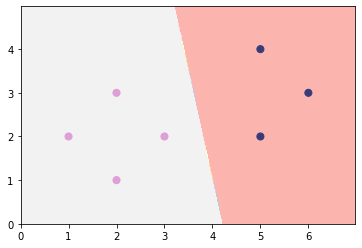

In [358]:
# Vaš kôd ovdje
classifier = LogisticRegression(solver='lbfgs',max_iter=2000)
classifier.fit(seven_X,seven_y)
predictions = classifier.predict(seven_X)

mlutils.plot_2d_clf_problem(seven_X,seven_y,clasifier.predict)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

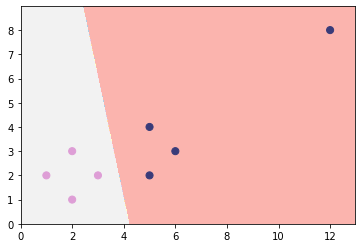

In [359]:
# Vaš kôd ovdje
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

classifier = LogisticRegression(solver='lbfgs',max_iter=2000)
classifier.fit(outlier_X,outlier_y)
predictions = classifier.predict(outlier_X)

mlutils.plot_2d_clf_problem(outlier_X,outlier_y,clasifier.predict)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


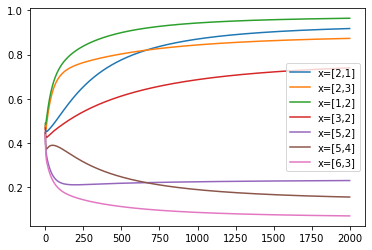

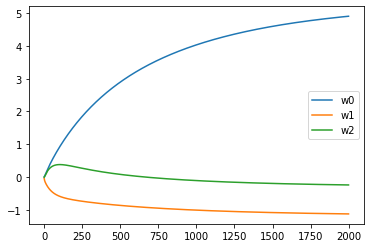

In [360]:
# Vaš kôd ovdje
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

classifier = LogisticRegression(solver='lbfgs',max_iter=2000)
classifier.fit(seven_X,seven_y)


seven_X_transformed = PolynomialFeatures(1).fit_transform(seven_X)
weights, all_w = lr_train(seven_X,seven_y,alpha=1,trace=True)
h0 = []
h1 = []
h2 = []
h3 = []
h4 = []
h5 = []
h6 = []

w0s = []
w1s = []
w2s = []


for w in all_w:
    h = np.dot(w,np.transpose(seven_X_transformed))
    h0.append(sigm(h[0]))
    h1.append(sigm(h[1]))
    h2.append(sigm(h[2]))
    h3.append(sigm(h[3]))
    h4.append(sigm(h[4]))
    h5.append(sigm(h[5]))
    h6.append(sigm(h[6]))
    
    w0s.append(w[0])
    w1s.append(w[1])
    w2s.append(w[2])
    
    
plt.plot(x_axis,h0,label="x=[2,1]")
plt.plot(x_axis,h1,label="x=[2,3]")
plt.plot(x_axis,h2,label="x=[1,2]")
plt.plot(x_axis,h3,label="x=[3,2]")
plt.plot(x_axis,h4,label="x=[5,2]")
plt.plot(x_axis,h5,label="x=[5,4]")
plt.plot(x_axis,h6,label="x=[6,3]")
plt.legend(loc="right")
plt.show()


plt.plot(x_axis,w0s,label="w0")
plt.plot(x_axis,w1s,label="w1")
plt.plot(x_axis,w2s,label="w2")
plt.legend(loc="right")
plt.show()


#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

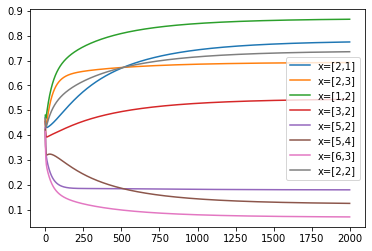

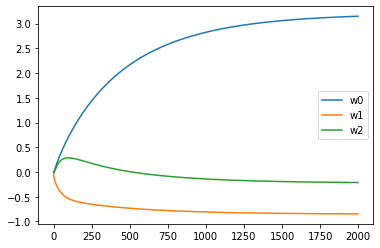

In [361]:
# Vaš kôd ovdje

classifier = LogisticRegression(solver='lbfgs',max_iter=2000)
classifier.fit(unsep_X,unsep_y)


seven_X_transformed = PolynomialFeatures(1).fit_transform(unsep_X)
weights, all_w = lr_train(unsep_X,unsep_y,alpha=1,trace=True)
h0 = []
h1 = []
h2 = []
h3 = []
h4 = []
h5 = []
h6 = []
h7 = []


w0s = []
w1s = []
w2s = []


for w in all_w:
    h = np.dot(w,np.transpose(seven_X_transformed))
    h0.append(sigm(h[0]))
    h1.append(sigm(h[1]))
    h2.append(sigm(h[2]))
    h3.append(sigm(h[3]))
    h4.append(sigm(h[4]))
    h5.append(sigm(h[5]))
    h6.append(sigm(h[6]))
    h7.append(sigm(h[7]))
    
    
    w0s.append(w[0])
    w1s.append(w[1])
    w2s.append(w[2])
    
    
plt.plot(x_axis,h0,label="x=[2,1]")
plt.plot(x_axis,h1,label="x=[2,3]")
plt.plot(x_axis,h2,label="x=[1,2]")
plt.plot(x_axis,h3,label="x=[3,2]")
plt.plot(x_axis,h4,label="x=[5,2]")
plt.plot(x_axis,h5,label="x=[5,4]")
plt.plot(x_axis,h6,label="x=[6,3]")
plt.plot(x_axis,h7,label="x=[2,2]")

plt.legend(loc="right")
plt.show()


plt.plot(x_axis,w0s,label="w0")
plt.plot(x_axis,w1s,label="w1")
plt.plot(x_axis,w2s,label="w2")
plt.legend(loc="right")
plt.show()

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [321]:
from numpy.linalg import norm

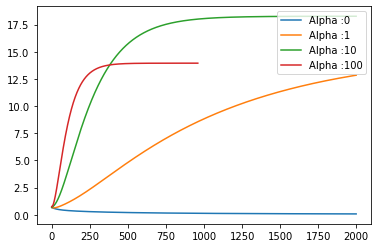

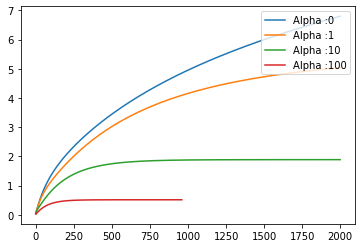

In [371]:
# Vaš kôd ovdje
alphas = [0, 1, 10, 100]

for a in alphas:
    final_weights, all_weights = lr_train(seven_X,seven_y,alpha=a,trace=True)
    cross_entropy_errors = []
    for wei in all_weights:
        cross_entropy_errors.append(cross_entropy_error(seven_X_transformed,seven_y,wei,alpha=a))
        
    plt.plot(cross_entropy_errors,label="Alpha :"+str(a))
plt.legend(loc="upper right")
plt.show()


for a in alphas:
    final_weights, all_weights = lr_train(seven_X,seven_y,alpha=a,trace=True)
    weights_norm = []
    for wei in all_weights:
        weights_norm.append(norm(wei))
        
    plt.plot(weights_norm,label="Alpha :"+str(a))
plt.legend(loc="upper right")
plt.show()

    

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

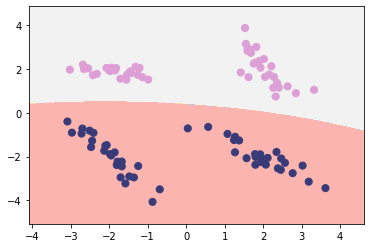

In [402]:
from sklearn.preprocessing import PolynomialFeatures
X, y = make_classification(n_samples=100, n_features=2,n_redundant=0,n_clusters_per_class=2, n_classes=2,class_sep=2)

poly = PolynomialFeatures(2)
phi = poly.fit_transform(X)
model = LogisticRegression(C=1.0,solver='lbfgs')
model.fit(phi,y)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))
plt.show()
#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))




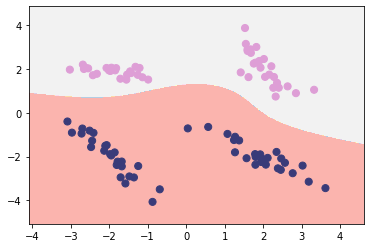

In [403]:
# Vaš kôd ovdje
poly = PolynomialFeatures(3)
phi = poly.fit_transform(X)
model = LogisticRegression(solver='lbfgs')
model.fit(phi,y)
mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))
plt.show()

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?